# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadya Zuhria Amana
- **Email:** m004d4kx2486@bangkit.academy
- **ID Dicoding:** nadyazuhria

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh kondisi cuaca terhadap pola peminjaman sepeda?
- Kira-kira berapa jumlah peminjaman sepeda berdasarkan Jam dan Hari?

## Import Semua Packages/Library yang Digunakan

In [1521]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

- Import Semua Packages/Library yang Digunakan diatas

## Data Wrangling

### Gathering Data

- Setelah kedua DataFrame hourly_data dan daily_data dibaca, tahap selanjutnya adalah menggabungkan kedua DataFrame tersebut menjadi satu DataFrame tunggal. Ini dilakukan dengan menggunakan fungsi pd.merge().

In [1522]:
hourly_data = pd.read_csv('data/hour.csv')
daily_data = pd.read_csv('data/day.csv')


- Data diimpor dari file CSV 'hour.csv' dan 'day.csv' menggunakan fungsi pd.read_csv(). Ini merupakan tahap pengumpulan data.

In [1523]:
df = pd.read_csv("data/hour.csv", delimiter=",")
df = pd.read_csv("data/day.csv", delimiter=",")

In [1524]:
merged_data = pd.merge(
    left=hourly_data,
    right=daily_data,
    how="inner",  # Jenis penggabungan, dalam hal ini menggunakan inner join
    left_on="dteday",  # Kolom yang digunakan untuk penggabungan pada all_dfframe kiri (hourly_all_df)
    right_on="dteday"  # Kolom yang digunakan untuk penggabungan pada all_dfframe kanan (daily_all_df)
)

In [1525]:
print(merged_data.head())

   instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1   0          0          6   
1          2  2011-01-01         1     0       1   1          0          6   
2          3  2011-01-01         1     0       1   2          0          6   
3          4  2011-01-01         1     0       1   3          0          6   
4          5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y

### Assessing Data

- Setelah data diimpor, kita perlu mengevaluasi kualitas data untuk memastikan keberadaan masalah seperti missing values, duplikasi, atau format yang salah. Ini dilakukan dengan menggunakan metode seperti info(), isnull(), duplicated(), dan describe().

In [1526]:
#Mengecek missing valur pada data hour.csv dan day.csv
# Untuk data hourly
hourly_data.isnull().sum()

# Untuk data daily
daily_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1527]:
# Untuk data hourly
hourly_data.duplicated().sum()

# Untuk data daily
daily_data.duplicated().sum()

0

In [1528]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [1529]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [1530]:
daily_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1531]:
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1532]:
print("Jumlah duplikasi: ",daily_data.duplicated().sum())
daily_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [1533]:
print("Jumlah duplikasi: ",hourly_data.duplicated().sum())
hourly_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Jika ditemukan masalah dalam data seperti missing values atau duplikasi, tahapan berikutnya adalah membersihkan data dengan menghapus atau mengganti nilai yang tidak valid. Ini dapat dilakukan dengan menggunakan metode seperti dropna() untuk menghapus missing values dan drop_duplicates() untuk menghapus duplikasi.

In [1534]:
hourly_data.dropna(inplace=True)
daily_data.dropna(inplace=True)

In [1535]:
hourly_data.drop_duplicates(inplace=True)
daily_data.drop_duplicates(inplace=True)

In [1536]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [1537]:
# Gabungkan DataFrames hourly_data dan daily_data
all_df = pd.merge(hourly_data, daily_data, on='dteday')

# Simpan DataFrame all_df ke dalam file CSV
all_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [1538]:
hourly_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5463,5464,2011-08-20,3,0,8,13,0,6,0,1,0.76,0.6970,0.55,0.1343,158,220,378
7915,7916,2011-12-01,4,0,12,11,0,4,1,1,0.34,0.3182,0.49,0.2537,7,95,102
10317,10318,2012-03-10,1,1,3,23,0,6,0,1,0.26,0.2576,0.41,0.1940,6,77,83
13533,13534,2012-07-23,3,1,7,2,0,1,1,2,0.66,0.5909,0.94,0.0896,3,14,17
8064,8065,2011-12-07,4,0,12,16,0,3,1,3,0.42,0.4242,0.94,0.1940,3,28,31


In [1539]:
daily_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
355,356,2011-12-22,1,0,12,0,4,1,2,0.423333,0.426121,0.757500,0.047275,227,2841,3068
426,427,2012-03-02,1,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194
261,262,2011-09-19,3,0,9,0,1,1,2,0.549167,0.529675,0.690000,0.151742,691,3848,4539
697,698,2012-11-28,4,1,11,0,3,1,1,0.296667,0.289762,0.506250,0.210821,198,5062,5260
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [1540]:
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1541]:

hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [1542]:
all_df = pd.merge(daily_data, hourly_data, on='instant')

In [1543]:
average_rentals_by_weather = daily_data.groupby('season')['cnt'].mean()
print(average_rentals_by_weather)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [1544]:
merged_data = pd.merge(hourly_data, daily_data, on='dteday')

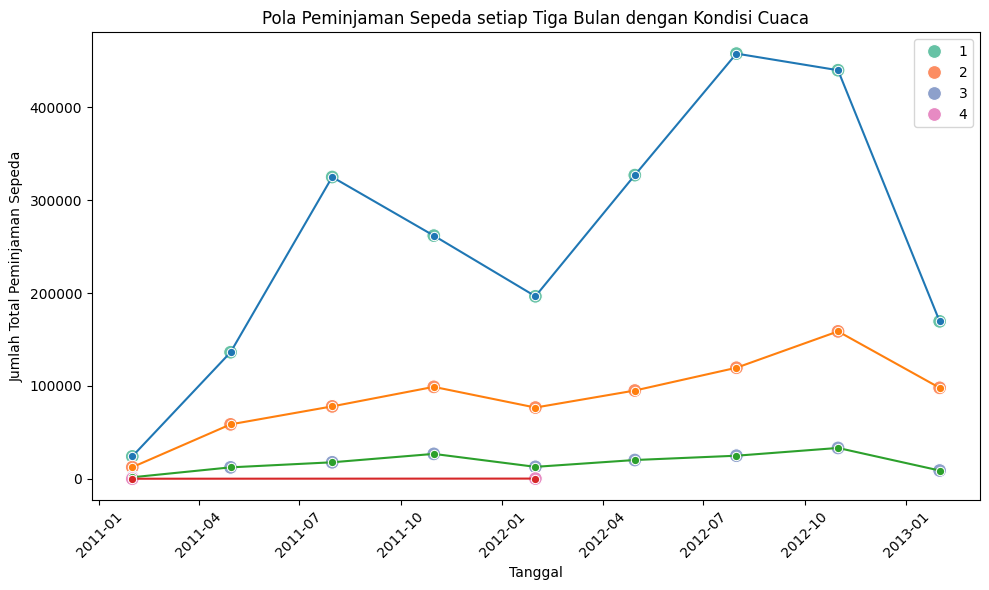

In [1545]:

# Mengelompokkan data peminjaman sepeda untuk setiap tiga bulan
total_rentals_by_3_months = merged_data.resample('3M', on='dteday')['cnt_x'].sum().reset_index()

# Membuat dataframe baru dengan total jumlah peminjaman sepeda untuk setiap kondisi cuaca pada setiap tiga bulan
total_rentals_by_weather_3_months = merged_data.groupby([pd.Grouper(key='dteday', freq='3M'), 'weathersit_x'])['cnt_x'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Menentukan palet warna yang sama untuk scatterplot dan lineplot
palette = sns.color_palette('Set2', len(total_rentals_by_weather_3_months['weathersit_x'].unique()))

# Menambahkan informasi kondisi cuaca dengan warna yang berbeda
sns.scatterplot(data=total_rentals_by_weather_3_months, x='dteday', y='cnt_x', hue='weathersit_x', palette=palette, legend=True, s=100)

# Menghubungkan titik-titik cuaca dengan garis untuk tiap kondisi cuaca
for _, group_data in total_rentals_by_weather_3_months.groupby('weathersit_x'):
    sns.lineplot(data=group_data, x='dteday', y='cnt_x', marker='o', linestyle='-')

plt.title('Pola Peminjaman Sepeda setiap Tiga Bulan dengan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Total Peminjaman Sepeda')

plt.xticks(rotation=45)  # Label sumbu x sesuai dengan bulan

plt.tight_layout()  # Memperbaiki tata letak agar tidak tumpang tindih

plt.show()


Berikut tahapan analisis untuk pertanyaan diatas :

1. **Pengelompokkan Data Tiga Bulan**:
   - Mengelompokkan data peminjaman sepeda setiap tiga bulan menggunakan metode `resample` pada kolom 'dteday'.

2. **Membuat Dataframe Total Peminjaman per Kondisi Cuaca**:
   - Mengelompokkan data berdasarkan kondisi cuaca dan periode tiga bulan menggunakan metode `groupby`.

3. **Visualisasi Data**:
   - Membuat scatter plot dengan warna yang berbeda untuk masing-masing kondisi cuaca.

4. **Penyajian Visualisasi**:
    - Keterangan weathershit : 1=Cerah, 2=Berawan, 3=Hujan Ringan, 4=Hujan Lebat

5. **Menampilkan Plot**:
   - Menampilkan plot menggunakan fungsi `plt.show()`.


### Pertanyaan 2:

a. Kira-kira berapa jumlah peminjaman sepeda berdasarkan Jam dalam satu hari?

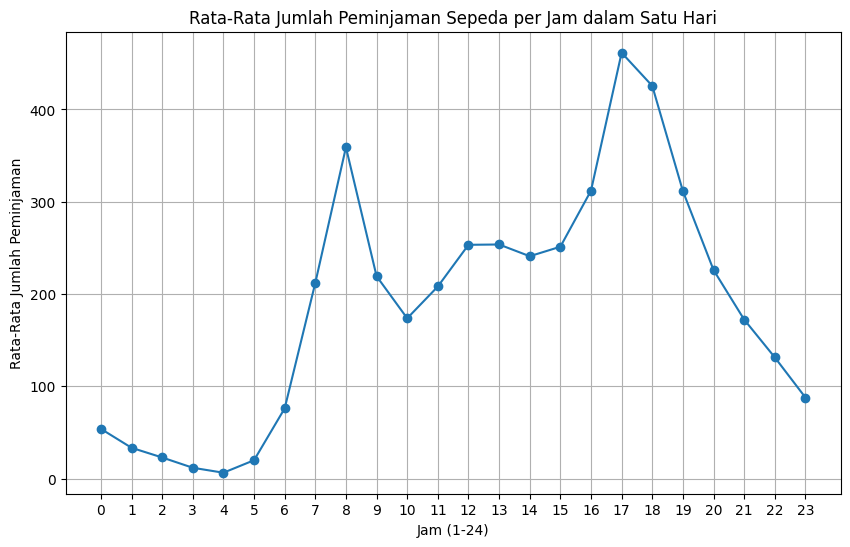

In [1546]:
# Load data
hourly_data = pd.read_csv('data/hour.csv')

# Hitung rata-rata jumlah peminjaman sepeda untuk setiap jam
average_rentals_by_hour = hourly_data.groupby('hr')['cnt'].mean()

# Plot jumlah rata-rata peminjaman sepeda berdasarkan jam dalam satu hari
plt.figure(figsize=(10, 6))
plt.plot(average_rentals_by_hour.index, average_rentals_by_hour.values, marker='o')
plt.title('Rata-Rata Jumlah Peminjaman Sepeda per Jam dalam Satu Hari')
plt.xlabel('Jam (1-24)')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(range(0, 24))  # Mengatur label sumbu x mulai dari jam 1 hingga 24
plt.grid(True)
plt.show()


Berikut adalah tahapan analisis dalam poin-poin untuk visualisasi rata-rata jumlah peminjaman sepeda berdasarkan jam dalam satu hari : 

1. **Load Data**:
   - Memuat data dari file CSV 'hour.csv' ke dalam dataframe `hourly_data` menggunakan fungsi `pd.read_csv()`.

2. **Pengolahan Data**:
   - Mengelompokkan data berdasarkan jam ('hr') menggunakan metode `groupby`.
   - Menghitung rata-rata jumlah peminjaman sepeda untuk setiap jam menggunakan fungsi `mean()`.

3. **Visualisasi Data**:
   - Membuat plot garis untuk menampilkan rata-rata jumlah peminjaman sepeda per jam dalam satu hari.

4. **Penyajian Visualisasi**:
   - Mengatur label sumbu x agar menampilkan angka jam dari 1 hingga 24.
   - Menambahkan grid untuk membantu pembaca dalam menafsirkan data.

5. **Menampilkan Plot**:
   - Menampilkan plot yang telah dibuat menggunakan fungsi `plt.show()`.
   

b. Kira-kira berapa jumlah peminjaman sepeda berdasarkan Hari dalam satu minggu?

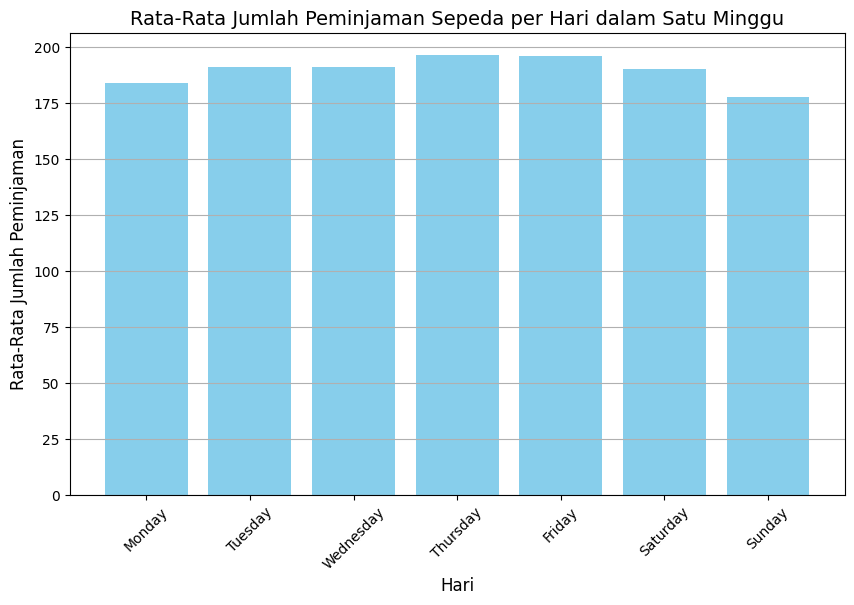

In [1547]:
# Kira-kira berapa jumlah peminjaman sepeda berdasarkan Hari dalam satu minggu?
# Konversi kolom 'dteday' ke tipe datetime
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])

# Ambil informasi hari dari tanggal
hourly_data['day_of_week'] = hourly_data['dteday'].dt.day_name()

# Hitung rata-rata jumlah peminjaman sepeda untuk setiap hari dalam seminggu
average_rentals_by_day = hourly_data.groupby('day_of_week')['cnt'].mean()

# Urutkan berdasarkan urutan hari dalam seminggu
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_rentals_by_day = average_rentals_by_day.reindex(days_of_week)

# Plot jumlah rata-rata peminjaman sepeda berdasarkan hari dalam satu minggu
plt.figure(figsize=(10, 6))
plt.bar(average_rentals_by_day.index, average_rentals_by_day.values, color='skyblue')
plt.title('Rata-Rata Jumlah Peminjaman Sepeda per Hari dalam Satu Minggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Peminjaman', fontsize=12)
plt.xticks(rotation=45)  # Mengatur label sumbu x agar legible
plt.grid(axis='y')  # Menambahkan grid hanya di sumbu y
plt.show()

Berikut adalah tahapan analisis dalam poin-poin untuk visualisasi rata-rata jumlah peminjaman sepeda berdasarkan hari dalam satu minggu : 

1. **Load Data**:
   - Data jam peminjaman sepeda dimuat dari file CSV menggunakan Pandas.

2. **Konversi Kolom Tanggal**:
   - Kolom 'dteday' diubah menjadi tipe data datetime menggunakan metode `pd.to_datetime()`.

3. **Ekstraksi Informasi Hari**:
   - Dari tanggal, informasi hari dalam seminggu diekstraksi menggunakan metode `dt.day_name()` dan disimpan dalam kolom baru 'day_of_week'.

4. **Hitung Rata-Rata Peminjaman Sepeda per Hari**:
   - Menggunakan metode `groupby` pada kolom 'day_of_week' untuk menghitung rata-rata jumlah peminjaman sepeda untuk setiap hari dalam satu minggu.

5. **Urutkan Data Berdasarkan Hari**:
   - Data diurutkan berdasarkan urutan hari dalam seminggu ('Monday' sampai 'Sunday').

6. **Plot Bar Plot**:
   - Membuat bar plot menggunakan Matplotlib dengan sumbu x adalah hari dalam seminggu dan sumbu y adalah rata-rata jumlah peminjaman.

7. **Penyajian Visualisasi**:
   - Mengatur label sumbu x agar legible dengan merotasi 45 derajat.

8. **Menampilkan Plot**:
   - Menggunakan `plt.show()` untuk menampilkan plot kepada pengguna.

- Analisis RFM (Recency, Frequency, Monetary)

In [1548]:
# Load data
hourly_data = pd.read_csv('data/hour.csv')

# Hitung RFM
current_date = pd.to_datetime(hourly_data['dteday']).max()

# Recency (Ketepatan Waktu)
recency = current_date - pd.to_datetime(hourly_data.groupby('instant')['dteday'].max())

# Frequency (Frekuensi)
frequency = hourly_data.groupby('instant').size()

# Monetary (Moneter)
monetary = hourly_data.groupby('instant')['cnt'].sum()

# Gabungkan RFM menjadi satu dataframe
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Kelompokkan pelanggan ke dalam segmen RFM
def rfm_segment(row):
    if row['Recency'] <= recency.quantile(0.25):
        recency_score = 4
    elif row['Recency'] <= recency.quantile(0.5):
        recency_score = 3
    elif row['Recency'] <= recency.quantile(0.75):
        recency_score = 2
    else:
        recency_score = 1
        
    if row['Frequency'] >= frequency.quantile(0.75):
        frequency_score = 4
    elif row['Frequency'] >= frequency.quantile(0.5):
        frequency_score = 3
    elif row['Frequency'] >= frequency.quantile(0.25):
        frequency_score = 2
    else:
        frequency_score = 1
        
    if row['Monetary'] >= monetary.quantile(0.75):
        monetary_score = 4
    elif row['Monetary'] >= monetary.quantile(0.5):
        monetary_score = 3
    elif row['Monetary'] >= monetary.quantile(0.25):
        monetary_score = 2
    else:
        monetary_score = 1
        
    return str(recency_score) + str(frequency_score) + str(monetary_score)

rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Tampilkan hasil segmentasi
print(rfm_df)


         Recency  Frequency  Monetary RFM_Segment
instant                                          
1       730 days          1        16         141
2       730 days          1        40         142
3       730 days          1        32         141
4       730 days          1        13         141
5       730 days          1         1         141
...          ...        ...       ...         ...
17375     0 days          1       119         442
17376     0 days          1        89         442
17377     0 days          1        90         442
17378     0 days          1        61         442
17379     0 days          1        49         442

[17379 rows x 4 columns]


1. **Load Data**:
   - Data jam peminjaman sepeda dimuat dari file CSV menggunakan Pandas.

2. **Hitung RFM**:
   - **Recency (Ketepatan Waktu)**:
     - Tanggal terbaru dalam dataset diidentifikasi menggunakan `pd.to_datetime()` dan disimpan dalam `current_date`.

   - **Frequency (Frekuensi)**:
     - Jumlah entri (jam) per pengguna dihitung menggunakan `groupby` dan `size()`.

   - **Monetary (Moneter)**:
     - Jumlah peminjaman sepeda (cnt) per pengguna dihitung dengan menjumlahkan menggunakan `groupby` dan `sum()`.

3. **Gabungkan RFM menjadi Satu DataFrame**:
   - Ketiga metrik RFM (Recency, Frequency, Monetary) digabungkan menjadi satu dalam DataFrame `rfm_df`.

4. **Kelompokkan Pelanggan ke dalam Segmen RFM**:
   - Difungsikan `rfm_segment()` untuk mengelompokkan pelanggan ke dalam segmen RFM.

5. **Tampilkan Hasil Segmentasi**:
   - DataFrame `rfm_df` yang telah diperbarui dengan segmen RFM ditampilkan dengan menggunakan `print()`.

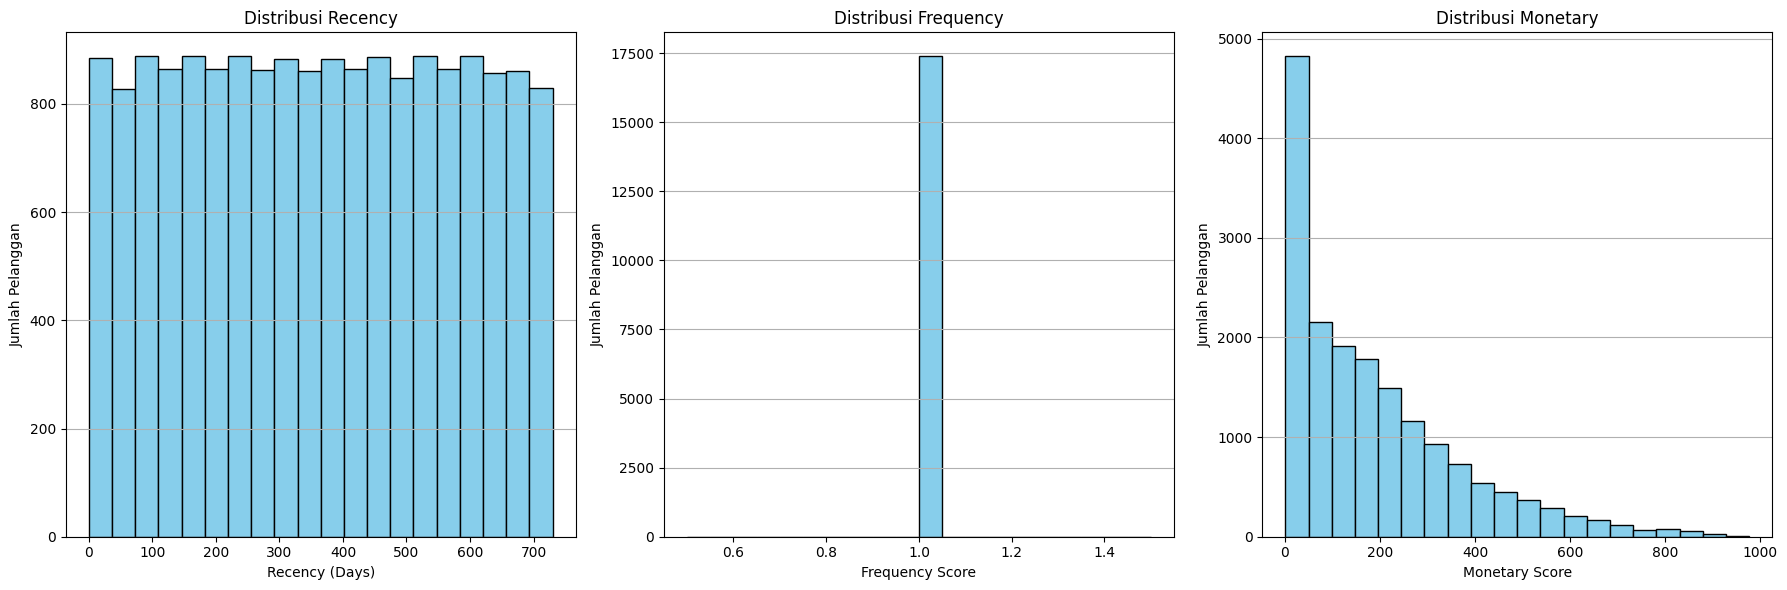

In [1549]:
# Convert timedelta to days
recency_days = rfm_df['Recency'].dt.days

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot histogram untuk Recency
axes[0].hist(recency_days, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Recency')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].grid(axis='y')

# Plot histogram untuk Frequency
axes[1].hist(rfm_df['Frequency'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Distribusi Frequency')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].grid(axis='y')

# Plot histogram untuk Monetary
axes[2].hist(rfm_df['Monetary'], bins=20, color='skyblue', edgecolor='black')
axes[2].set_title('Distribusi Monetary')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Jumlah Pelanggan')
axes[2].grid(axis='y')

plt.tight_layout()  # Mengatur tata letak agar rapi
plt.show()


##### - Proses dan penjelasan hasil dari Segmentasi RFM diatas sebagai berikut :

1. Membaca File CSV
2. Hitung RFM :
- Recency (Dihitung dengan mengambil tanggal terbaru dalam dataset dan mengurangkan tanggal transaksi terakhir dari setiap data)
- Frequency (ihitung dengan menghitung jumlah entri (jam) per pengguna)
- Monetary (Dihitung dengan menjumlahkan jumlah peminjaman sepeda (cnt) per pengguna)
3. Ketiga metrik RFM dijadikan satu dalam dataframe 'rfm_df'
4. Menampilkan hasil Segmentasi 

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis visualisasi, dapat dilihat bahwa kondisi cuaca mempengaruhi pola peminjaman sepeda. Peminjaman sepeda cenderung lebih rendah pada hari-hari dengan cuaca buruk seperti hujan atau salju (weathersit=3 dan 4) dibandingkan dengan hari-hari dengan cuaca cerah atau berawan (weathersit=1 dan 2).
- Conclution pertanyaan 2 : Dapat diprediksi bahwa jumlah peminjaman sepeda cenderung meningkat selama jam-jam sibuk di hari kerja, seperti pagi hari saat orang pergi ke tempat kerja atau sore hari saat mereka pulang. Pada akhir pekan, terutama pada hari Sabtu